In [243]:
using Pandas
using DataFrames
using PyCall
using PyPlot
using CSV

pickle = pyimport("pickle")
numpy = pyimport("numpy")
scipy_integrate = pyimport("scipy.integrate")

PyObject <module 'scipy.integrate' from '/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/scipy/integrate/__init__.py'>

In [2]:
function load_pickle(filename)
    @pywith pybuiltin("open")(filename,"rb") as f begin
       data = nothing
       data = pickle.load(f)
       return data
    end
end

load_pickle (generic function with 1 method)

In [3]:
data = load_pickle("data.pkl")

Dict{Any,Any} with 10 entries:
  "var"            => PyObject 0610007P14Rik    0.078030…
  "O"              => PyObject 0610007P14Rik    0.075990…
  "diffWords"      => PyObject Cell_id…
  "heaps_integral" => (6.93379e7, 0.00669541)
  "M"              => PyObject Cell_id…
  "means_nonzero"  => PyObject 0610007P14Rik    1.036145…
  "heaps_fit"      => [4.25923, 0.732378]
  "freq"           => PyObject 0610007P14Rik    9.397300e-05…
  "cv2"            => PyObject 0610007P14Rik      12.586668…
  "means"          => PyObject 0610007P14Rik    0.078737…

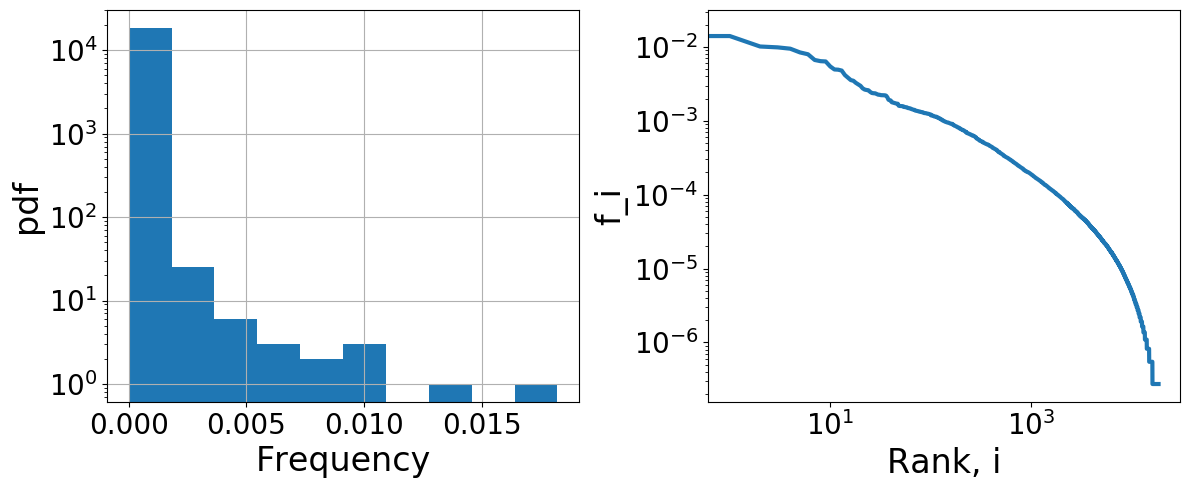

In [4]:
fig, ax = subplots(1,2, figsize=(12,5))
data["freq"].hist(ax=ax[1], bins=10)
ax[1].set_yscale("log")
ax[1].set_xlabel("Frequency", fontsize=24)
ax[1].set_ylabel("pdf", fontsize=24)

f = data["freq"].sort_values(ascending=false)
ax[2].plot(f/f.sum())
ax[2].set_xscale("log")
ax[2].set_yscale("log")
ax[2].set_xlabel("Rank, i", fontsize=24)
ax[2].set_ylabel("f_i", fontsize=24)
fig.savefig("f_distribution.pdf")
show()

In [7]:
tissue = "Fetal_Brain"

data = Dict()
data["data"]=load_pickle("data_$(tissue)_data.pkl")
#data["mazzolini"]=load_pickle("data_$(tissue)_mazzolini.pkl")
#data["null_1"]=load_pickle("data_$(tissue)_null_1.pkl")

Dict{Any,Any} with 10 entries:
  "var"            => PyObject 0610007P14Rik    0.078030…
  "O"              => PyObject 0610007P14Rik    0.075990…
  "diffWords"      => PyObject Cell_id…
  "heaps_integral" => (6.93379e7, 0.00669541)
  "M"              => PyObject Cell_id…
  "means_nonzero"  => PyObject 0610007P14Rik    1.036145…
  "heaps_fit"      => [4.25923, 0.732378]
  "freq"           => PyObject 0610007P14Rik    9.397300e-05…
  "cv2"            => PyObject 0610007P14Rik      12.586668…
  "means"          => PyObject 0610007P14Rik    0.078737…

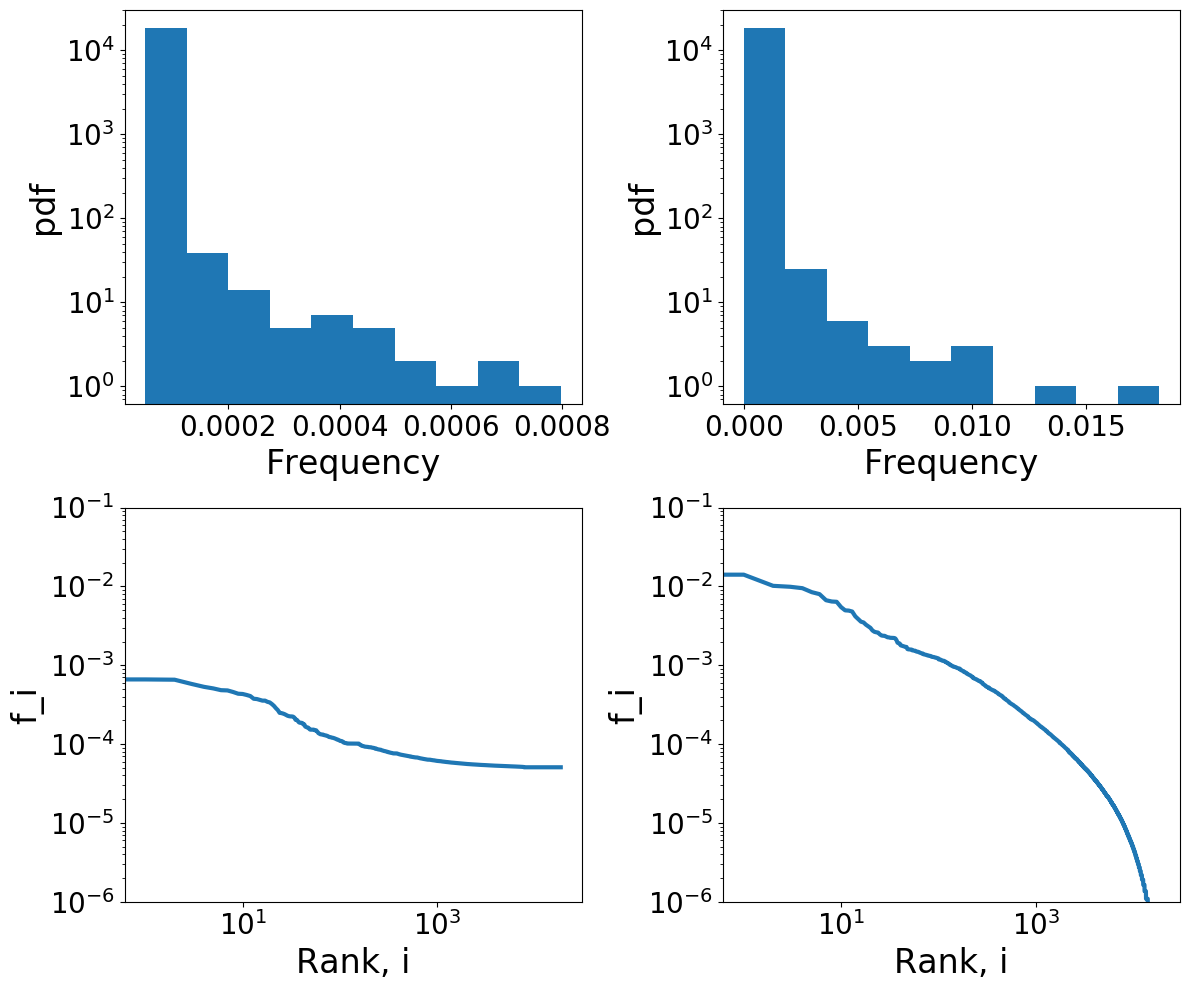

In [8]:
fig, ax = subplots(2,2, figsize=(12,10))
f = data["data"]["means_nonzero"].sort_values(ascending=false)

ax[1].hist(f/f.sum(),  bins=10)
ax[1].set_yscale("log")
ax[1].set_xlabel("Frequency", fontsize=24)
ax[1].set_ylabel("pdf", fontsize=24)

ax[2].plot(f/f.sum())
ax[2].set_xscale("log")
ax[2].set_yscale("log")
ax[2].set_ylim(1e-6,1e-1)
ax[2].set_xlabel("Rank, i", fontsize=24)
ax[2].set_ylabel("f_i", fontsize=24)


f = data["data"]["means"].sort_values(ascending=false)

ax[3].hist(f/f.sum(), bins=10)
ax[3].set_yscale("log")
ax[3].set_xlabel("Frequency", fontsize=24)
ax[3].set_ylabel("pdf", fontsize=24)

ax[4].plot(f/f.sum())
ax[4].set_xscale("log")
ax[4].set_yscale("log")
ax[4].set_ylim(1e-6,1e-1)
ax[4].set_xlabel("Rank, i", fontsize=24)
ax[4].set_ylabel("f_i", fontsize=24)
fig.savefig("f_distribution.pdf")
show()

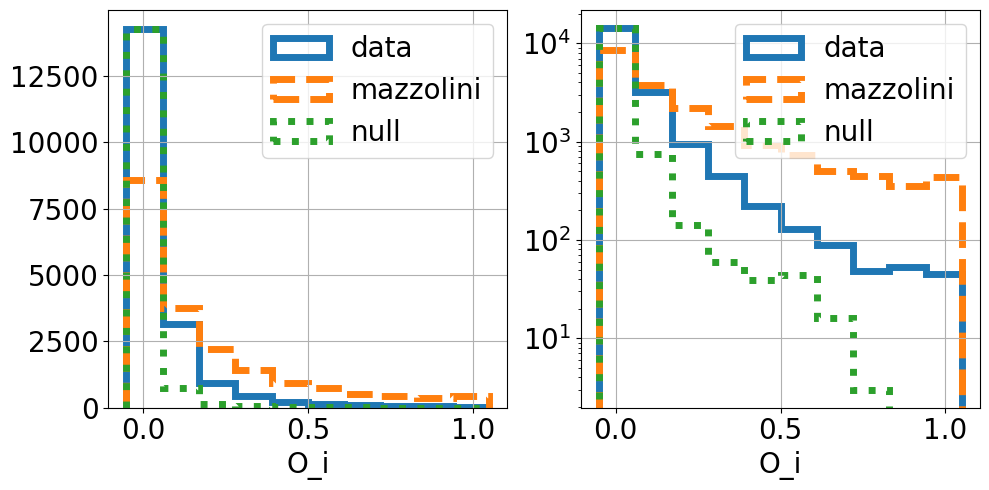

In [77]:
bins=10
rang = (0-0.5/bins, 1+0.5/bins)
fig, ax = subplots(1,2, figsize=(10,5))

data["data"]["O"].hist(histtype="step", lw=5, ax=ax[1], range=rang, bins=bins, label="data")
data["mazzolini"]["O"].hist(histtype="step", lw=5, ax=ax[1], range=rang, bins=bins, ls="--", label="mazzolini")
data["null_1"]["O"].hist(histtype="step", lw=5, ax=ax[1], range=rang, bins=bins, ls=":", label="null")

ax[1].legend(fontsize=20)
ax[1].set_xlabel("O_i")

data["data"]["O"].hist(histtype="step", lw=5, ax=ax[2], range=rang, bins=bins, label="data")
data["mazzolini"]["O"].hist(histtype="step", lw=5, ax=ax[2], range=rang, bins=bins, ls="--", label="mazzolini")
data["null_1"]["O"].hist(histtype="step", lw=5, ax=ax[2], range=rang, bins=bins, ls=":", label="null")

ax[2].set_yscale("log")
ax[2].legend(fontsize=20)
ax[2].set_xlabel("O_i")

fig.savefig("null_1_U.pdf")

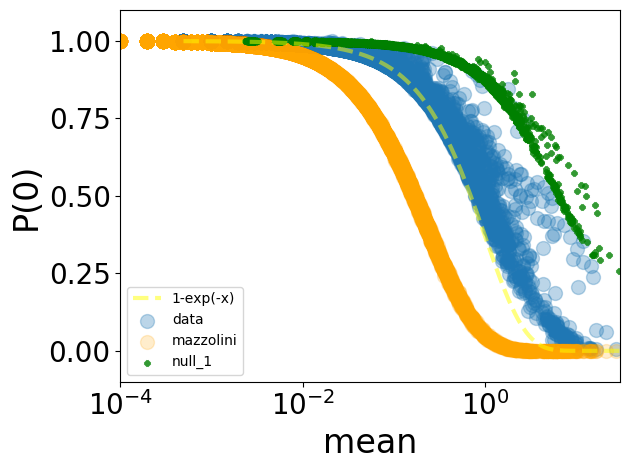

In [89]:
fig, ax = PyPlot.subplots()

function fx(X)
    ret = Vector{Float64}()
    for x in X.values
        append!(ret, exp(-x))
    end
   return ret
end

ax.scatter(data["data"]["means"], 1-data["data"]["O"], alpha=0.3, label="data")
ax.plot(data["data"]["means"].sort_values(), fx(data["data"]["means"].sort_values()), c="yellow", ls="--", alpha=0.5, label="1-exp(-x)")
ax.scatter(data["mazzolini"]["means"], 1-data["mazzolini"]["O"], c="orange", alpha=0.2, label="mazzolini")
ax.scatter(data["null_1"]["means"], 1-data["null_1"]["O"], marker="x", s=10, c="green", alpha=0.8, label="null_1")


ax.legend()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlim(1e-4,30)
ax.set_ylim(-0.1,1.1)

ax.set_xlabel("mean", fontsize=24)
ax.set_ylabel("P(0)", fontsize=24)

fig.savefig("null_1_P_mean.pdf")
show()

In [45]:
data["data"]["means"].sort_values()

PyObject n-R5s2      0.000229
Gm10601     0.000229
Gm10634     0.000229
Gm10640     0.000229
Gm10643     0.000229
             ...    
Hbb-bs      7.949645
Hba-a2      8.283360
Ubb         8.515679
Hba-a1     11.793545
Hbb-y      15.248112
Length: 18554, dtype: float64

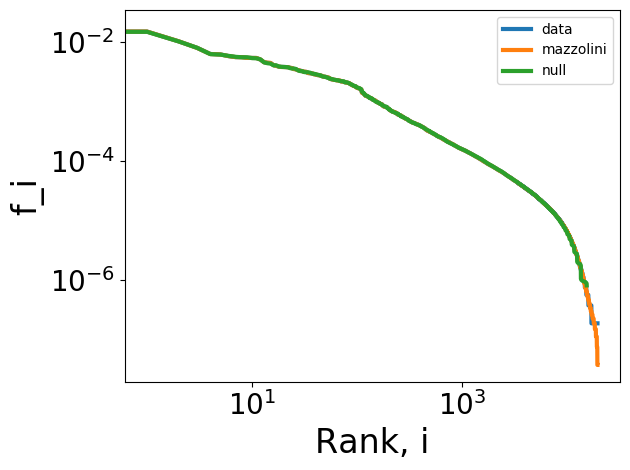

In [79]:
fig, ax = PyPlot.subplots()
ax.plot(data["data"]["freq"].sort_values(ascending=false).values, label="data")
ax.plot(data["mazzolini"]["freq"].sort_values(ascending=false).values, label="mazzolini")
ax.plot(data["null_1"]["freq"].sort_values(ascending=false).values, label="null")

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")

ax.set_xlabel("Rank, i", fontsize=24)
ax.set_ylabel("f_i", fontsize=24)
show()

fig.savefig("null_1_zipf.pdf")

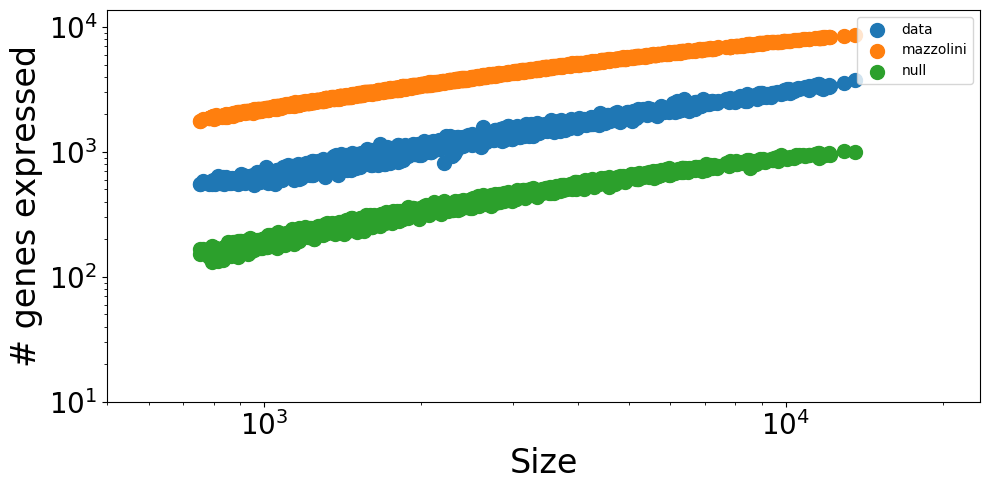

In [80]:
fig, ax = PyPlot.subplots(figsize=(10,5))
ax.scatter(data["data"]["M"].values, data["data"]["diffWords"].values, label="data")
ax.scatter(data["mazzolini"]["M"].values, data["mazzolini"]["diffWords"].values, label="mazzolini")
ax.scatter(data["null_1"]["M"].values, data["null_1"]["diffWords"].values, label="null")


ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlim(500,data["data"]["M"].max()+1e4)
ax.set_ylim(10,data["mazzolini"]["diffWords"].max()+5e3)

ax.set_xlabel("Size", fontsize=24)

ax.set_ylabel("# genes expressed", fontsize=24)
show()

fig.savefig("null_1_heaps.pdf")

In [212]:
for g in data["data"]["freq"].sort_values(ascending=false).index
    println(g)
end

Hbb-y
Hba-a1
Ubb
Hba-a2
Hbb-bs
Tmsb4x
mt-Cytb
Hba-x
Hbb-bt
Nnat
Ftl1
Stmn1
H3f3b
Tuba1a
Tmsb10
mt-Nd1
Cfl1
Calm1
Rpl13
Rpl18a
Rpl41
Rtn1
mt-Nd4
Ptma
Hspa8
Rps26
Rps14
Atpif1
mt-Nd2
Tubb5
Rps29
Tubb2b
Calm2
Rps27
Prdx2
Rpl32
mt-Co1
Rpl35
Fth1
Rps9
Rps11
Ttr
Marcksl1
Chchd2
Rps19
Rps15a
Tubb3
Elob
Hmgn2
Eif1
Hint1
Hn1
H2afz
Rpl14
Rplp1
Slc25a5
mt-Rnr2
Hmgn1
Rpl11
Rpl37
Oaz1
Cox4i1
Rpl26
Cdk4
Rps24
Actb
Son
H2afv
Hnrnpk
Rpl4
Nme1
Stmn2
Slc25a4
Atp5j
Cox6c
Cox6b1
Rps3
Rps7
Sub1
Rpl38
Snrpd3
Usmg5
Cox5a
Hnrnpa2b1
Eif5a
Psmb6
Mif
Psma7
Rpl34
Rpl10
Rpl37a
Hist3h2ba
Rpl23
Nrep
Rps8
Cox7c
Rps13
Atp5k
Rpsa
Gapdh
Rpl8
Dynlrb1
Rpl18
Ywhae
Rpl31
Rpl21
Selenow
Cox6a1
Rps28
Rps21
Rpl36
Rpl7
Tecr
Rps27a
Pkm
Rpl39
Ndufa4
Cox7a2
Rps5
Rplp0
Rps23
Serf1
Atp5o
Swi5
Nedd8
Gm1673
Rps15
Rpl30
Ndufc1
Bex3
Rpl23a
Ddx5
Atxn7l3b
Rps3a1
Igfbpl1
Rbx1
Rplp2
Srsf3
Ranbp1
Tpt1
Rps18
Bex2
Prmt1
Gm1821
Ywhaq
Ndufb9
Atp5f1
Stmn3
Rps17
Rps2
Atp5j2
Cd24a
Rpl27
Rps20
Ndufa5
Gap43
Map1lc3b
Rpl3
Ndufb8
Tagln3
Dynll1
Fkbp3
Snr

In [231]:
keys(load_pickle("data_$(tissue)_data.pkl")["heaps_fit"])

2-element LinearIndices{1,Tuple{Base.OneTo{Int64}}}:
 1
 2

In [263]:
integrals = []
tissues = (split(split(f,"data_")[2],"_data")[1] for f in readdir() if occursin(".pkl",f))

function fit_func(x,a,b)
    return a*x^b
end

for tissue in tissues
    #print(tissue)
    integral=load_pickle("data_$(tissue)_data.pkl")["heaps_integral"][1]
    params = load_pickle("data_$(tissue)_data.pkl")["heaps_fit"]
    integral=scipy_integrate.quad(fit_func, 500, 1000, args=(params[1], params[2]))[1]
    append!(integrals, integral::Float64)
end
integrals = DataFrames.DataFrame(data=integrals, index = [t for t in tissues])
sort!(integrals, rev=true)

,data,index
,Any,SubStrin…
1,3.12677e5,Testis
2,2.98625e5,Thymus
3,291510.0,Ovary
4,2.80862e5,Male_Fetal_Gonad
5,2.77514e5,Bladder
6,273619.0,Mesenchymal-Stem-Cell-Cultured
7,2.72447e5,Uterus
8,2.70601e5,Fetal_Brain
9,2.67507e5,Brain


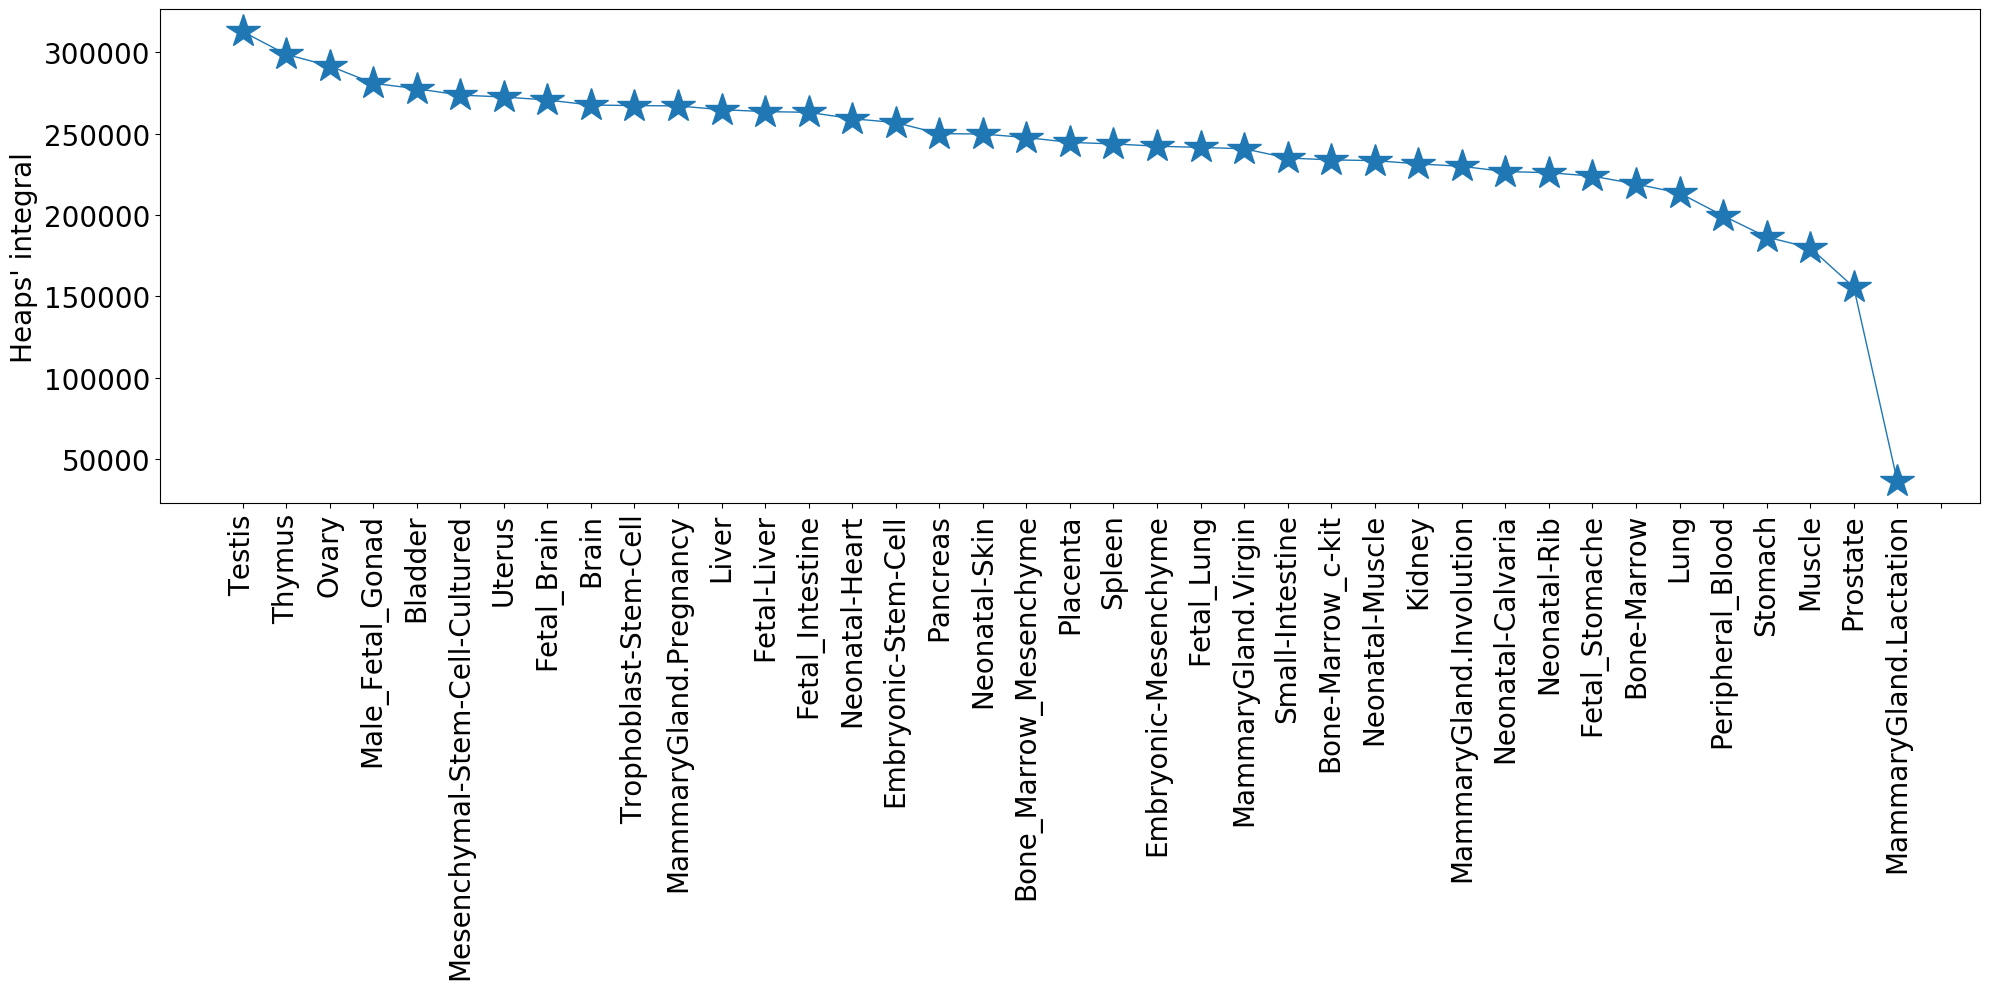

In [264]:
fig = PyPlot.figure(figsize=(20,10))
PyPlot.plot(integrals.data, marker="*", lw=1, ms=25)
locs, labels = xticks()
PyPlot.xticks(0:length(integrals.index), labels = integrals.index, rotation=90)
PyPlot.ylabel("Heaps' integral", fontsize=20)
fig.savefig("itegral_heapfs_scatter_plot.pdf")

In [219]:
CSV.write("integral.csv", integrals)

"integral.csv"

In [218]:
integrals.rank=1:length(integrals.index)

1:39

In [224]:
mca_tm = CSV.read("integral.csv")

,index,MCA,TM
,String,Int64,Int64
1,Brain,1,7
2,Thymus,2,12
3,Muscle,3,9
4,Pancreas,4,2
5,Liver,5,3
6,Fetal_Brain,6,7
7,MammaryGland.Virgin,7,5
8,Spleen,8,11
9,MammaryGland.Pregnancy,9,5


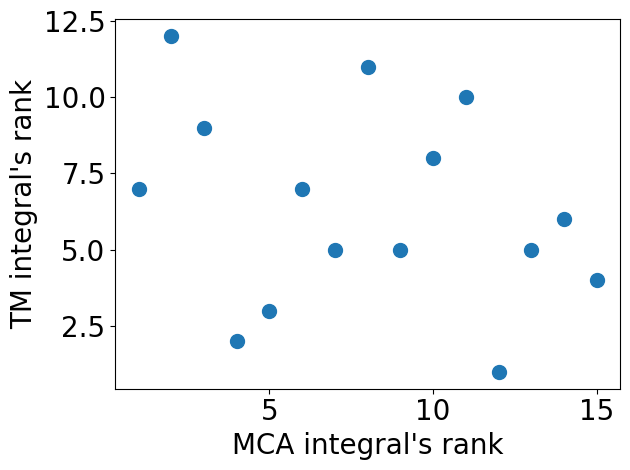

In [227]:
fig = PyPlot.figure()
PyPlot.scatter(mca_tm.MCA, mca_tm.TM)
PyPlot.xlabel("MCA integral's rank")
PyPlot.ylabel("TM integral's rank")
fig.savefig("heaps_rank_both.pdf")

In [254]:
integrals

,data,index
,Any,SubStrin…
1,3.12677e5,Testis
2,2.98625e5,Thymus
3,291510.0,Ovary
4,2.80862e5,Male_Fetal_Gonad
5,2.77514e5,Bladder
6,273619.0,Mesenchymal-Stem-Cell-Cultured
7,2.72447e5,Uterus
8,2.70601e5,Fetal_Brain
9,2.67507e5,Brain
